In [1]:
pip install insight

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install insightface

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install onnxruntime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface #To do face analysis app for loading model
from insightface.app import FaceAnalysis #
from insightface.data import get_image as ins_get_image #to download and get the sample image from the dataset

In [6]:
print('insightface',insightface.__version__)
print('numpy',np.__version__)

insightface 0.7.3
numpy 1.24.3


**Step 1: Detect Faces**

In [7]:
app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=0, det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}

c:\Users\MukeshAppana\AppData\Local\Programs\Python\Python310\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(



find model: C:\Users\MukeshAppana/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\MukeshAppana/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\MukeshAppana/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\MukeshAppana/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\MukeshAppana/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


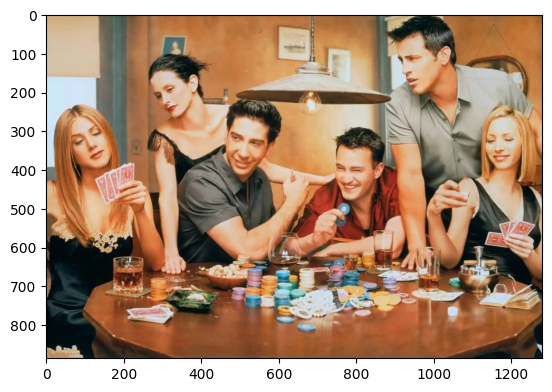

In [8]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1]) 
#reverse the order of the color channels (likely from BGR to RGB) as matplotlib is RGB and Open CV is BGR we are converting to default RGB to show
plt.show()

In [9]:
faces = app.get(img)

c:\Users\MukeshAppana\AppData\Local\Programs\Python\Python310\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [10]:
faces #retuirns a dictionary of len 6 key value pairs indication there are 6 faces in image.

[{'bbox': array([466.0821 , 268.6164 , 573.58923, 415.5331 ], dtype=float32),
  'kps': array([[491.85046, 321.8314 ],
         [541.85266, 332.11188],
         [507.67114, 366.41312],
         [485.91965, 369.691  ],
         [533.74945, 378.3811 ]], dtype=float32),
  'det_score': 0.9196533,
  'landmark_3d_68': array([[ 4.69443695e+02,  2.96989471e+02,  7.57227936e+01],
         [ 4.68134155e+02,  3.12719116e+02,  7.92197113e+01],
         [ 4.66747955e+02,  3.28960175e+02,  8.15076981e+01],
         [ 4.66053284e+02,  3.45325989e+02,  8.09227753e+01],
         [ 4.66922272e+02,  3.62514740e+02,  7.33340378e+01],
         [ 4.71003143e+02,  3.77187256e+02,  6.58566513e+01],
         [ 4.75966827e+02,  3.90255829e+02,  5.81926956e+01],
         [ 4.82846588e+02,  4.03262604e+02,  4.71076164e+01],
         [ 4.97964294e+02,  4.14659698e+02,  4.25628624e+01],
         [ 5.16660706e+02,  4.12995361e+02,  4.67766647e+01],
         [ 5.30892578e+02,  4.03689392e+02,  5.69011192e+01],
       

In [11]:
len(faces)

6

In [12]:
faces[1] #gives each face details as per index of the dictionary list 0,1,2,3,4,5..... you can give any index to find out the face details present.

{'bbox': array([745.35284, 338.7414 , 845.6634 , 479.09033], dtype=float32),
 'kps': array([[760.51294, 395.49942],
        [803.72736, 402.7126 ],
        [771.53094, 431.75635],
        [762.99475, 437.4276 ],
        [806.5269 , 443.0071 ]], dtype=float32),
 'det_score': 0.9118049,
 'landmark_3d_68': array([[ 7.54960999e+02,  3.80383698e+02,  7.97579193e+01],
        [ 7.56716858e+02,  3.94544800e+02,  8.14546738e+01],
        [ 7.58028503e+02,  4.09239929e+02,  8.18253860e+01],
        [ 7.58973816e+02,  4.24010437e+02,  7.92894821e+01],
        [ 7.59320129e+02,  4.38877960e+02,  7.06729813e+01],
        [ 7.62648926e+02,  4.50605469e+02,  6.22348137e+01],
        [ 7.65954407e+02,  4.60714691e+02,  5.40282326e+01],
        [ 7.69351746e+02,  4.70647491e+02,  4.23188400e+01],
        [ 7.81701660e+02,  4.78741302e+02,  3.13629837e+01],
        [ 7.99519043e+02,  4.75103882e+02,  2.87250957e+01],
        [ 8.14242249e+02,  4.65925964e+02,  3.41351013e+01],
        [ 8.26106140e+02,

In [13]:
faces[1].keys() #gives the type of details of the face recognized. 

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

In [14]:
faces[1].bbox #bbox values of respective face. can check any details from the above.

array([745.35284, 338.7414 , 845.6634 , 479.09033], dtype=float32)

from the above Embeddings are used when doing the face swap

**cropping and plotting the faces**

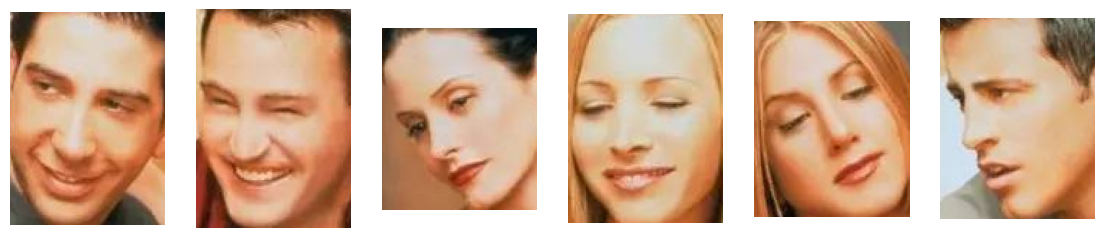

In [15]:
img=ins_get_image('t1')
fig,axs = plt.subplots(1,6,figsize=(14,6))

#converting values into int from the list of bbox from face data.
for i, face in enumerate(faces):
    bbox=face['bbox']
    bbox = [int(b) for b in bbox] 
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

**step 2: face Swapping**

In [16]:
swapper = insightface.model_zoo.get_model('D:\Mukesh\Work Files\Project\Face Swap final sample Developed code\models\inswapper_128.onnx',download=False,download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [17]:
import os

print("Current working directory:", os.getcwd())


Current working directory: d:\Mukesh\Work Files\Project\Face Swap final sample Developed code


In [18]:
import os

model_path = 'OneDrive - Hanyaa/Mukesh/Work FIles/Project/insight face/models/inswapper_128.onnx'
print(f"Does the model file exist? {os.path.exists(model_path)}")


Does the model file exist? False


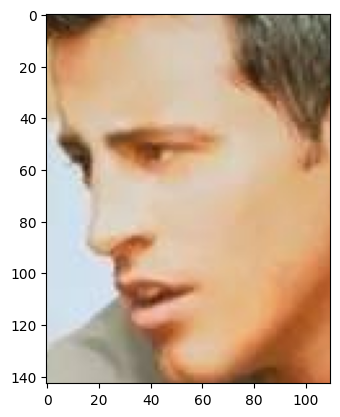

In [19]:
source_face =faces[5]
bbox=source_face['bbox']
bbox = [int(b) for b in bbox] 
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [20]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

**After Swapper.get**

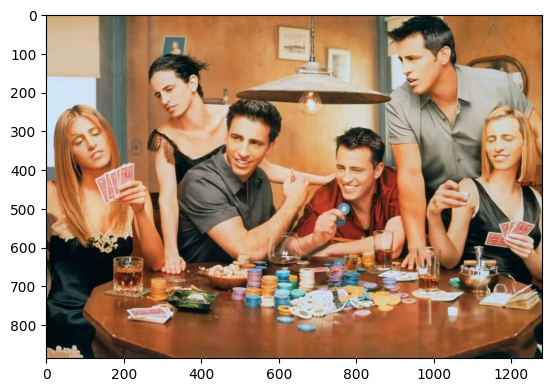

In [21]:
plt.imshow(res[:,:,::-1])
plt.show()

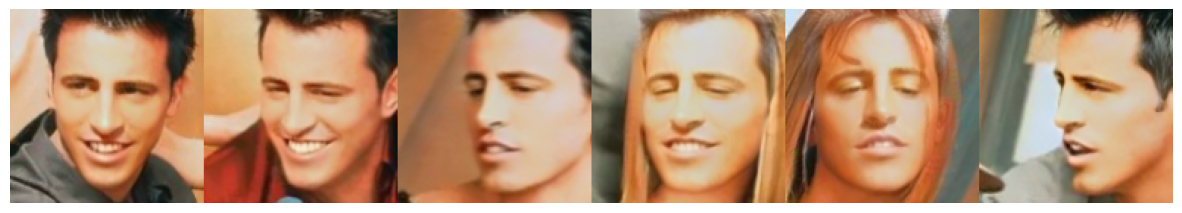

In [22]:
# res = img.copy()
result=[]
for face in faces:
    _img, _ = swapper.get(res, face, source_face, paste_back=False)
    result.append(_img)
result = np.concatenate(result,axis=1)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(result[:,:,::-1])
ax.axis('off')
plt.show()
    

**Swapping using my face**

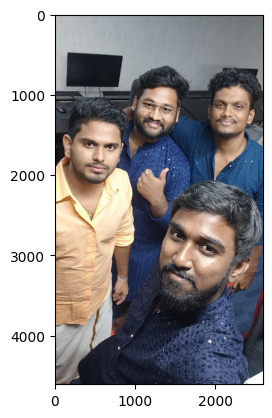

In [23]:
# arrjvvm= cv2.imread('D:\Mukesh\Work Files\Project\Face Swap final sample Developed code\mukesh.jpg')
arrjvvm = cv2.imread('D:\Mukesh\Work Files\Project\Face Swap final sample Developed code\ofc.jpg')
plt.imshow(arrjvvm[:,:,::-1])
plt.show()

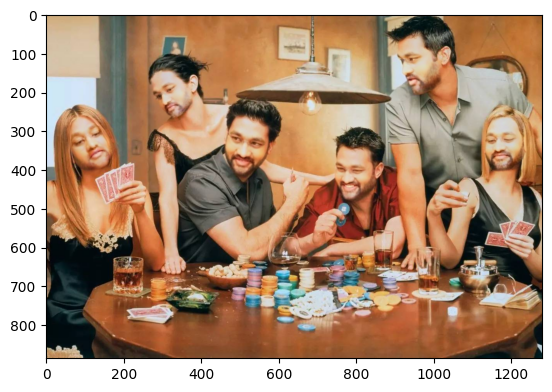

In [24]:
#detect the face
my_faces = app.get(arrjvvm)
my_face = my_faces[1]
#replacing my face in friends image
op = img.copy()
for face in faces:
    op=swapper.get(op,face,my_face,paste_back=True)
plt.imshow(op[:,:,::-1])
plt.show()
# fig, ax = plt.subplots(figsize=(15,15))
# ax.imshow(result[:,:,::-1])
# ax.axis('off')
# plt.show()

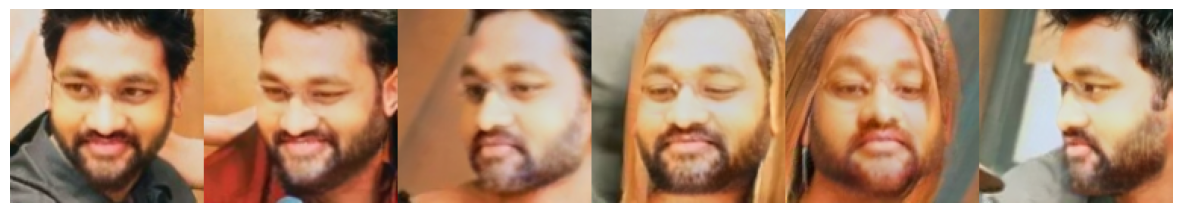

In [25]:
# res = img.copy()
output=[]
for face in faces:
    _img, _ = swapper.get(op, face, my_face, paste_back=False)
    output.append(_img)
output= np.concatenate(output,axis=1)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(output[:,:,::-1])
ax.axis('off')
plt.show()
    

**Face Swap Function for images with single faces, swapping with opposite faces**

In [26]:
#used face swapper to swap faces in two different images.
#plot_before: if True show the images before the swap.
#plot_after: if True show the images after the swap.
#returns images with swapped faces.
#assuming one face per image this function is built.
#the below function swaps faces with opposite faces in each image.
def swap_n_show(img1_file, img2_file, app, swapper, plot_before=True, plot_after=True):
    img1 = cv2.imread(img1_file)
    img2 = cv2.imread(img2_file)
    
    if plot_before:
        fig, axs = plt.subplots(1,2, figsize=(10,5))
        axs[0].imshow(img1[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2[:,:,::-1])
        axs[1].axis('off')
        
    face1= app.get(img1)[0]
    face2= app.get(img2)[0]

    img1_ =img1.copy()
    img2_ =img2.copy()
    
    if plot_after:
        img1_ = swapper.get(img1_,face1, face2, paste_back=True)
        img2_ = swapper.get(img2_,face2, face1, paste_back=True)
        fig, axs = plt.subplots(1,2, figsize=(10,5))
        axs[0].imshow(img1_[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2_[:,:,::-1])
        axs[1].axis('off')
        plt.show()
    return img1_, img2_

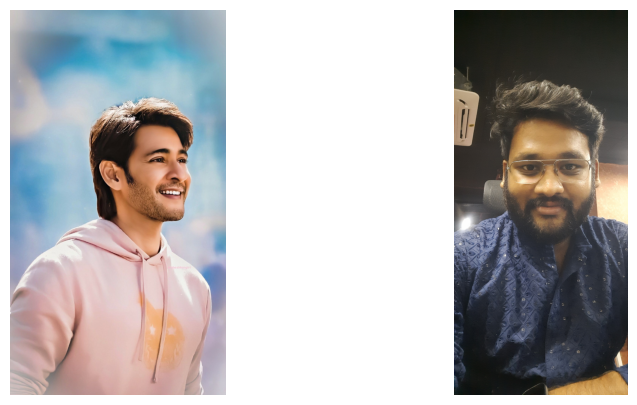

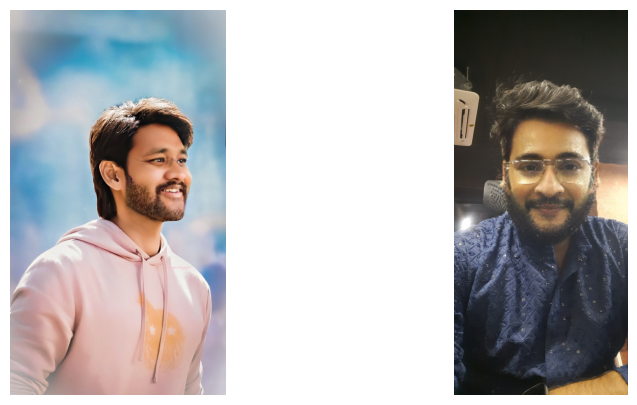

(array([[[196, 200, 205],
         [196, 200, 205],
         [196, 200, 205],
         ...,
         [198, 192, 181],
         [198, 192, 181],
         [199, 193, 182]],
 
        [[196, 200, 205],
         [196, 200, 205],
         [196, 200, 205],
         ...,
         [198, 192, 181],
         [198, 192, 181],
         [199, 193, 182]],
 
        [[196, 200, 205],
         [196, 200, 205],
         [196, 200, 205],
         ...,
         [198, 192, 181],
         [198, 192, 181],
         [199, 193, 182]],
 
        ...,
 
        [[192, 191, 207],
         [193, 192, 208],
         [193, 192, 208],
         ...,
         [211, 204, 207],
         [211, 204, 207],
         [211, 204, 207]],
 
        [[193, 191, 210],
         [193, 191, 210],
         [193, 191, 210],
         ...,
         [211, 204, 207],
         [211, 204, 207],
         [211, 204, 207]],
 
        [[193, 191, 210],
         [193, 191, 210],
         [193, 191, 210],
         ...,
         [211, 204, 207],
  

In [27]:
swap_n_show("D:\Mukesh\Work Files\Project\Face Swap final sample Developed code\MB3.jpg","D:\Mukesh\Work Files\Project\Face Swap final sample Developed code\mukesh.jpg",app, swapper, plot_before=True, plot_after=True)

In [28]:
import os

print("Current working directory:", os.getcwd())

Current working directory: d:\Mukesh\Work Files\Project\Face Swap final sample Developed code


**Face Swapping from same image**

In [29]:
#used face swapper to swap faces in an image of two different faces.
#plot_before: if True show the images before the swap.
#plot_after: if True show the images after the swap.
#returns images with swapped faces.
#the below function swaps faces with opposite faces in a single image.
def swap_n_show_same_img(img1_file, app, swapper, plot_before=True, plot_after=True):
    img1 = cv2.imread(img1_file)
    # img2 = cv2.imread(img2_file)
    
    if plot_before:
        fig, axs = plt.subplots(1,1, figsize=(5,5))
        axs.imshow(img1[:,:,::-1])
        axs.axis('off')
        # axs[1].imshow(img2[:,:,::-1])
        # axs[1].axis('off')
        
    face1= app.get(img1)[0]
    face2= app.get(img1)[1]

    img1_ =img1.copy()
    # img2_ =img1.copy()
    
    if plot_after:
        img1_ = swapper.get(img1_,face1, face2, paste_back=True)
        img1_ = swapper.get(img1_,face2, face1, paste_back=True)
        fig, axs = plt.subplots(1,1, figsize=(5,5))
        axs.imshow(img1_[:,:,::-1])
        axs.axis('off')
        # axs[1].imshow(img2_[:,:,::-1])
        # axs[1].axis('off')
        plt.show()
    # return img1_
    cv2.imwrite("swapped_image.jpg",img1_) #saves the image with repsective file name
    #cv2.imwrite("desiredpath/of/savelocation/of/file/filename.jpg", image)

In [30]:
import glob
friends = glob.glob('MS*')

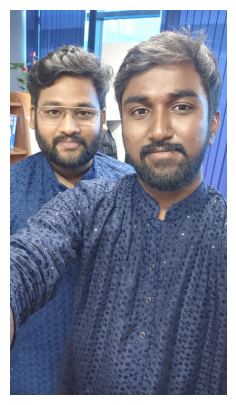

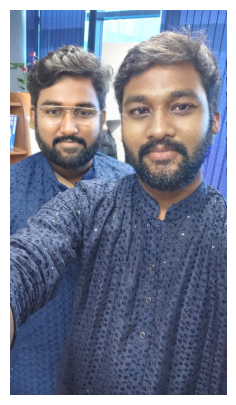

In [31]:
swap_n_show_same_img('D:\Mukesh\Work Files\Project\Face Swap final sample Developed code\MS.jpg', app, swapper, plot_before=True, plot_after=True)